In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('iris_data.csv')
data.head()

,sepal length,sepal width,petal length,petal width,target,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [2]:
x = data.drop(['target', 'label'], axis=1)
y = data.loc[:, 'label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x, y)
y_pred = KNN.predict(x)

accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.96


In [4]:
from sklearn.preprocessing import StandardScaler

x_norm = StandardScaler().fit_transform(x)
print(x_norm)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [9]:
x1 = x.loc[:, 'sepal length']
x1_mean = x1.mean()
x1_sigma = x1.std()

x1_norm = x_norm[:, 0]
x1_norm_mean = x1_norm.mean()
x1_norm_sigma = x1_norm.std()

print(x1_mean, x1_sigma, x1_norm_mean, x1_norm_sigma)

5.843333333333334 0.828066127977863 -4.736951571734001e-16 1.0


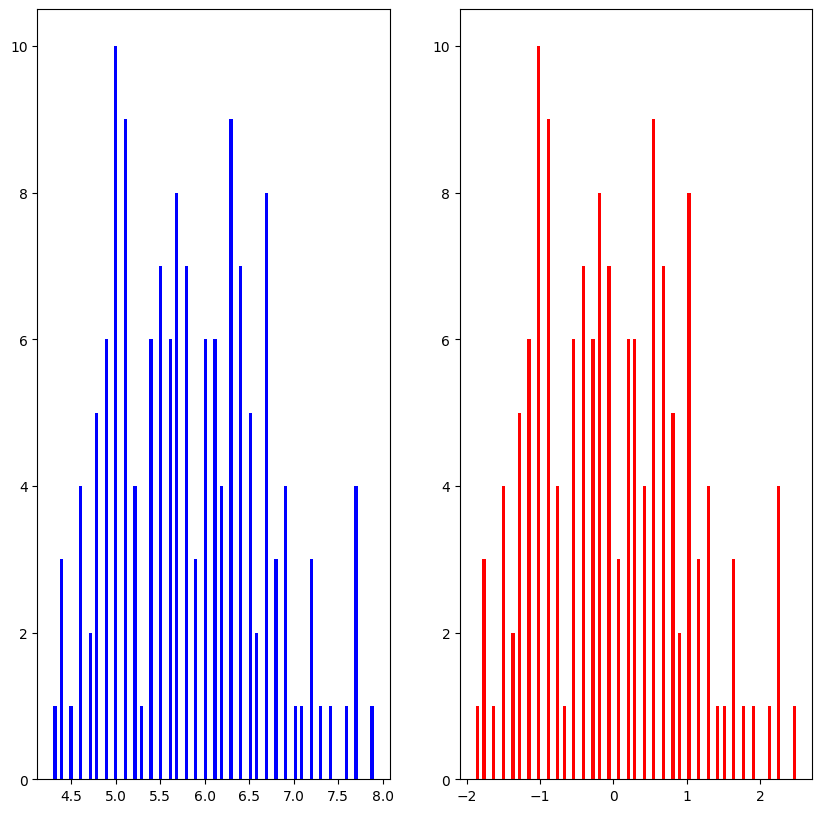

In [8]:
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.hist(x.loc[:, 'sepal length'], bins=100, color='blue', label='sepal length (cm)')
plt.subplot(122)
plt.hist(x_norm[:, 0], bins=100, color='red', label='sepal length (cm) normalized')
plt.show()

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
x_pca = pca.fit_transform(x_norm)

var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.72770452 0.23030523 0.03683832 0.00515193]


In [12]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_norm)

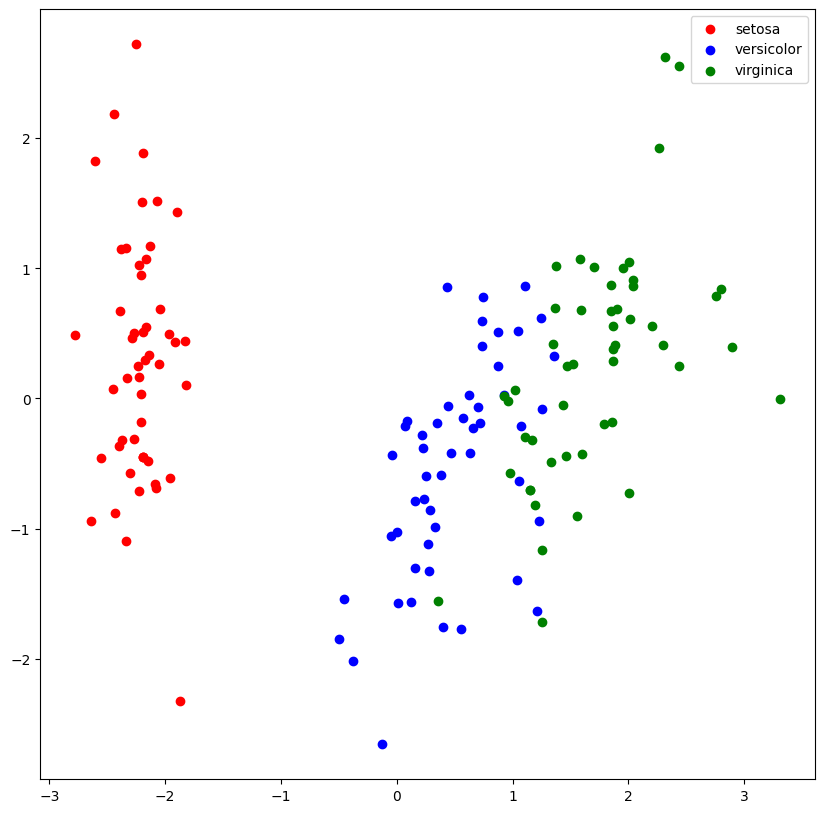

In [15]:
fig2 = plt.figure(figsize=(10, 10))
x_pca_0, x_pca_1 = x_pca[:, 0], x_pca[:, 1]
setosa = plt.scatter(x_pca_0[y == 0], x_pca_1[y == 0], color='red', label='setosa')
versicolor = plt.scatter(x_pca_0[y == 1], x_pca_1[y == 1], color='blue', label='versicolor')
virginica = plt.scatter(x_pca_0[y == 2], x_pca_1[y == 2], color='green', label='virginica')
plt.legend(handles=[setosa, versicolor, virginica])
plt.show()

In [16]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_pca, y)
y_pred = KNN.predict(x_pca)

accuracy = accuracy_score(y, y_pred)
print(accuracy)

0.9466666666666667
